In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("../data/raw/train(1).csv")
test = pd.read_csv("../data/raw/test2.csv")

train.shape, test.shape

((16209, 21), (5404, 20))

#### Data Dictionary
sqft_living → Total built-up area

sqft_living15 → Neighborhood average size

lat, long → Location proxy

grade → Construction quality

view, waterfront → Visual appeal

In [2]:
train.isnull().sum()
train.duplicated().sum()


np.int64(0)

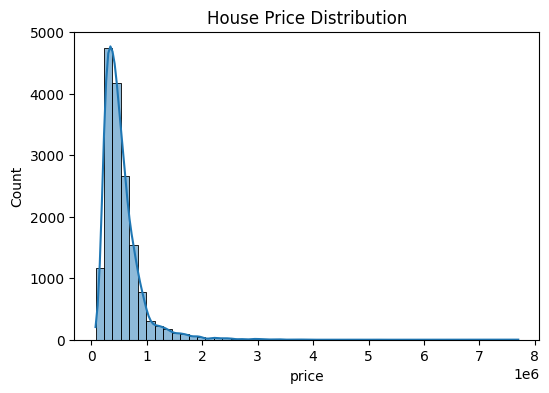

In [3]:
plt.figure(figsize=(6,4))
sns.histplot(train['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()


### Log Transform

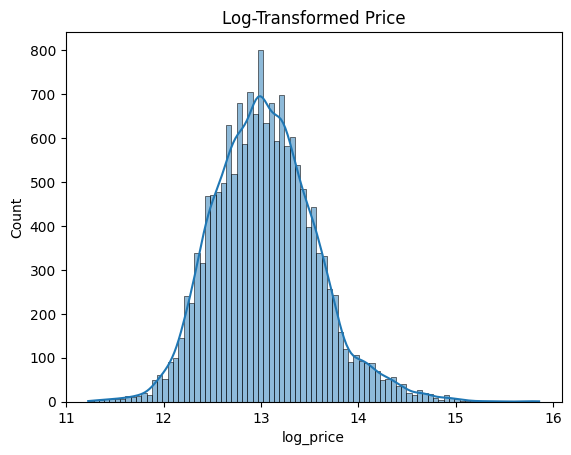

In [4]:
train['log_price'] = np.log1p(train['price'])

sns.histplot(train['log_price'], kde=True)
plt.title("Log-Transformed Price")
plt.show()


### Feature vs Price Analysis

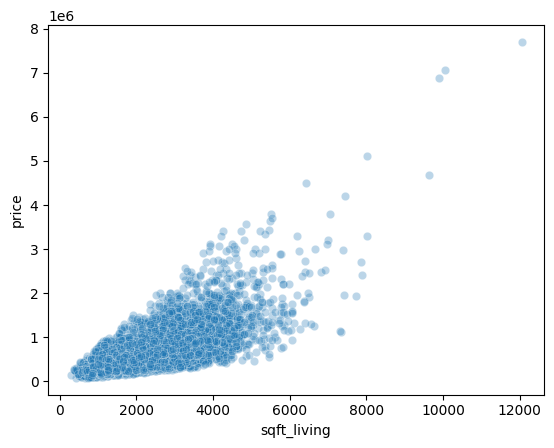

In [5]:
sns.scatterplot(x='sqft_living', y='price', data=train, alpha=0.3)
plt.show()


### Grade vs Price

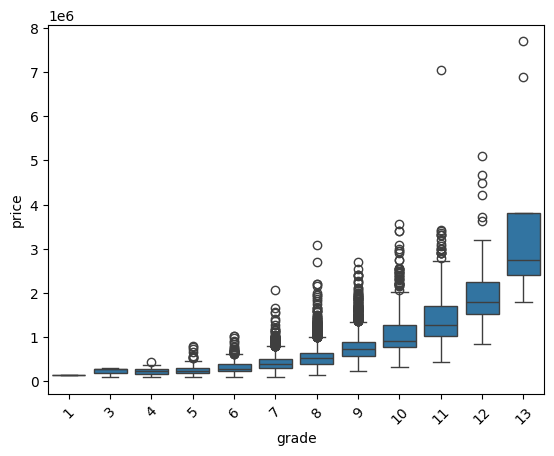

In [6]:
sns.boxplot(x='grade', y='price', data=train)
plt.xticks(rotation=45)
plt.show()


### Waterfront Premium

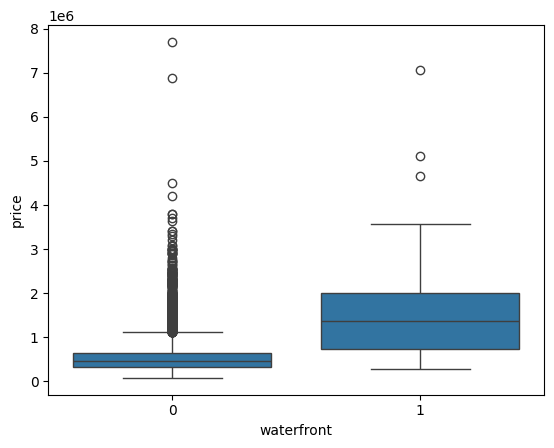

In [7]:
sns.boxplot(x='waterfront', y='price', data=train)
plt.show()


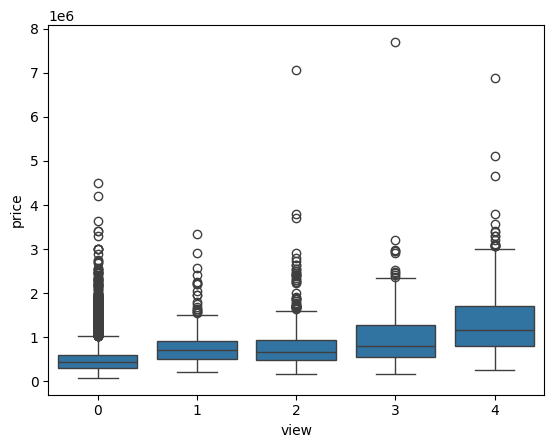

In [8]:
sns.boxplot(x='view', y='price', data=train)
plt.show()


### Neighborhood Density Effect

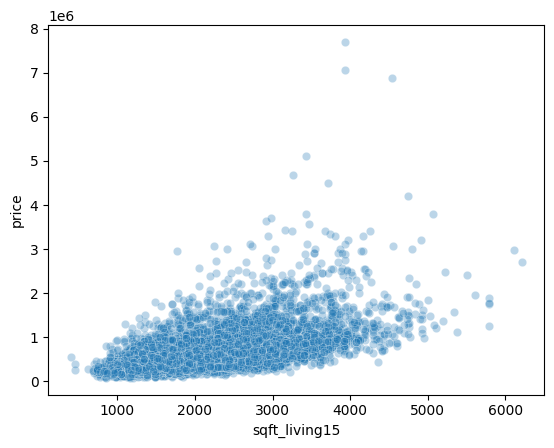

In [9]:
sns.scatterplot(
    x='sqft_living15',
    y='price',
    data=train,
    alpha=0.3
)
plt.show()


### Geospatial Analysis

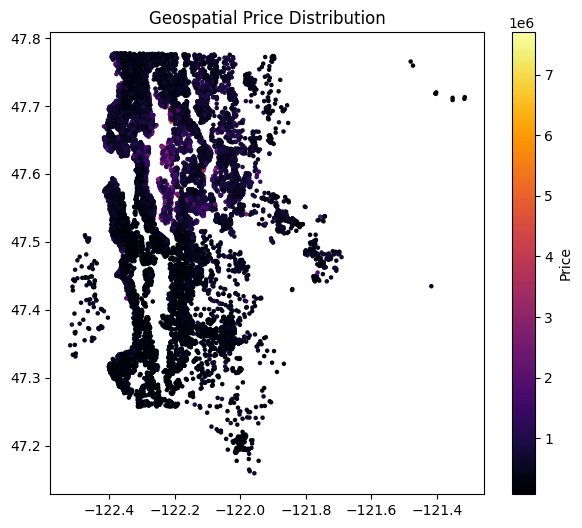

In [10]:
plt.figure(figsize=(7,6))
plt.scatter(
    train['long'],
    train['lat'],
    c=train['price'],
    cmap='inferno',
    s=5
)
plt.colorbar(label="Price")
plt.title("Geospatial Price Distribution")
plt.show()


### High vs Low Price Regions

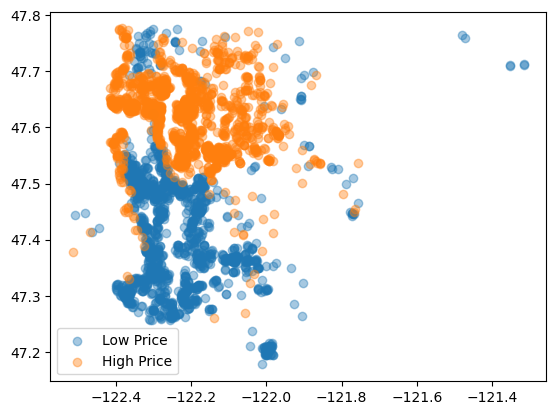

In [11]:
high_price = train[train['price'] > train['price'].quantile(0.9)]
low_price = train[train['price'] < train['price'].quantile(0.1)]

plt.scatter(low_price['long'], low_price['lat'], label="Low Price", alpha=0.4)
plt.scatter(high_price['long'], high_price['lat'], label="High Price", alpha=0.4)
plt.legend()
plt.show()


### Correlation Matrix

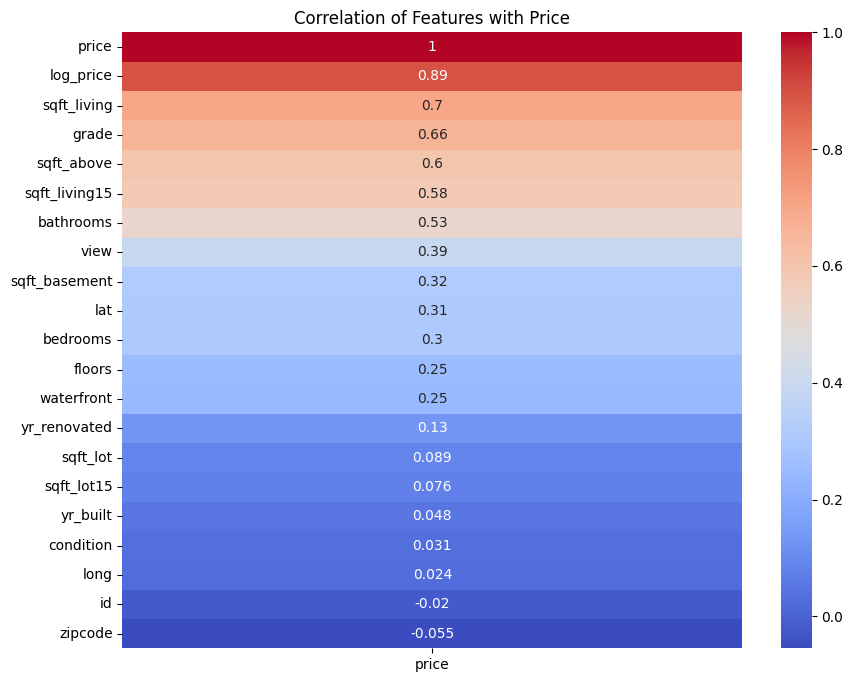

In [12]:
numeric_train = train.select_dtypes(include=['int64', 'float64'])
corr = numeric_train.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr[['price']]
    .sort_values(by='price', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation of Features with Price")
plt.show()



### Green Cover / Openness vs Price

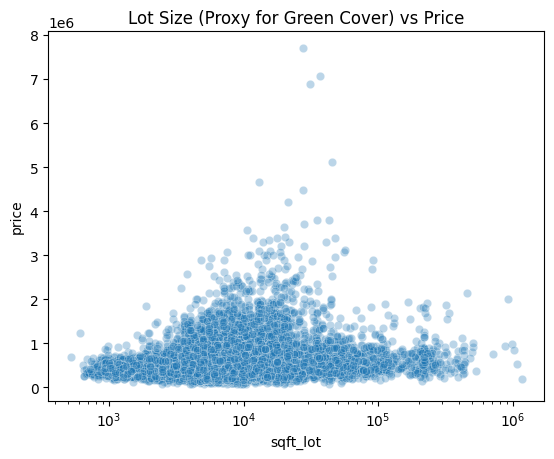

In [13]:
sns.scatterplot(
    x='sqft_lot',
    y='price',
    data=train,
    alpha=0.3
)
plt.xscale('log')
plt.title("Lot Size (Proxy for Green Cover) vs Price")
plt.show()


### Neighborhood Green Density

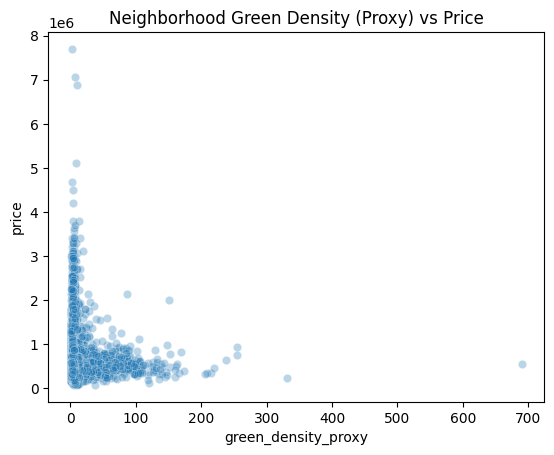

In [14]:
train['green_density_proxy'] = train['sqft_lot15'] / train['sqft_living15']

sns.scatterplot(
    x='green_density_proxy',
    y='price',
    data=train,
    alpha=0.3
)
plt.title("Neighborhood Green Density (Proxy) vs Price")
plt.show()


### Neighborhood Density vs Price

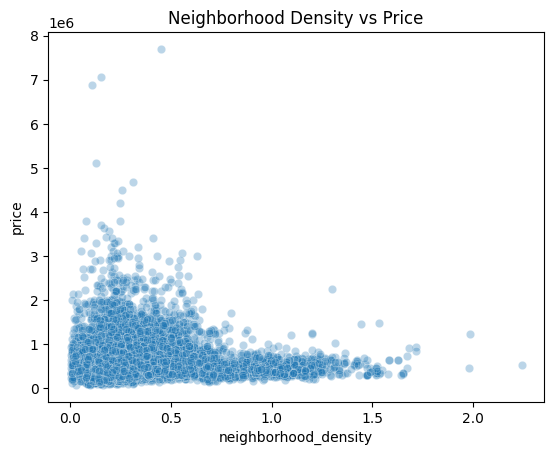

In [15]:
train['neighborhood_density'] = train['sqft_living15'] / train['sqft_lot15']

sns.scatterplot(
    x='neighborhood_density',
    y='price',
    data=train,
    alpha=0.3
)
plt.title("Neighborhood Density vs Price")
plt.show()


### Visual Spaciousness Score

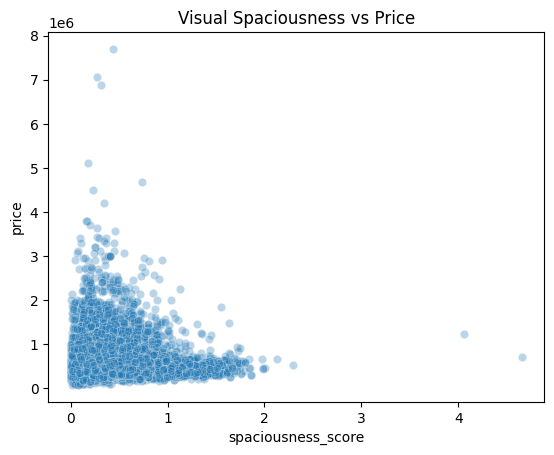

In [16]:
train['spaciousness_score'] = train['sqft_living'] / train['sqft_lot']

sns.scatterplot(
    x='spaciousness_score',
    y='price',
    data=train,
    alpha=0.3
)
plt.title("Visual Spaciousness vs Price")
plt.show()


### Urban vs Suburban Clustering

In [17]:
from sklearn.cluster import KMeans

coords = train[['lat', 'long']]
kmeans = KMeans(n_clusters=5, random_state=42)
train['location_cluster'] = kmeans.fit_predict(coords)


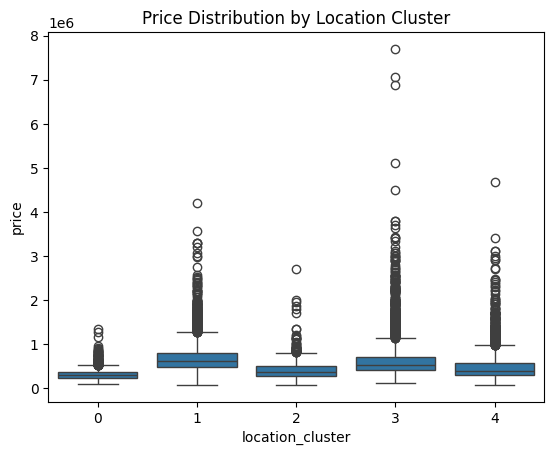

In [18]:
sns.boxplot(
    x='location_cluster',
    y='price',
    data=train
)
plt.title("Price Distribution by Location Cluster")
plt.show()


### Waterfront + Greenery Interaction

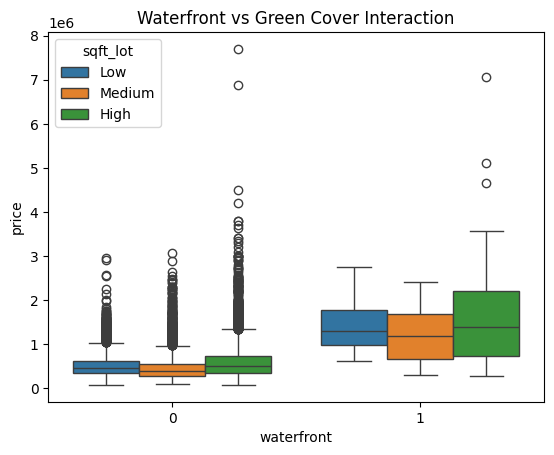

In [19]:
sns.boxplot(
    x='waterfront',
    y='price',
    hue=pd.qcut(train['sqft_lot'], 3, labels=['Low','Medium','High']),
    data=train
)
plt.title("Waterfront vs Green Cover Interaction")
plt.show()


### View Quality vs Location

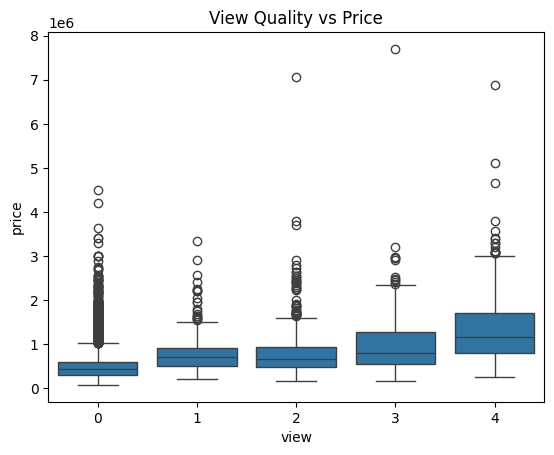

In [20]:
sns.boxplot(
    x='view',
    y='price',
    data=train
)
plt.title("View Quality vs Price")
plt.show()


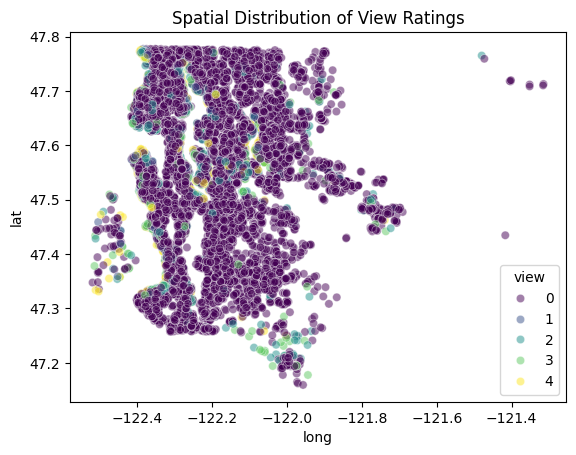

In [21]:
sns.scatterplot(
    x='long',
    y='lat',
    hue='view',
    data=train,
    palette='viridis',
    alpha=0.5
)
plt.title("Spatial Distribution of View Ratings")
plt.show()
